In [4]:
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt

from bcnf.utils import get_dir
from bcnf.simulation.sampling import generate_data_old

In [5]:
T = 1.5
dt = 1/60

In [8]:
dataset_name = "fixed_data_render_2s_15FPS"
with open(os.path.join(get_dir('data', 'bcnf-data', dataset_name, 'train'), dataset_name + '_1.pkl'), 'rb') as f:
    data = pickle.load(f)

# data = generate_data_old(T=T, dt=dt, N=2000, break_on_impact=False)

In [9]:
X = np.array(data['traj'])
X.shape

(1000, 30, 3)

Text(0.5, 0.98, 'New Sampling')

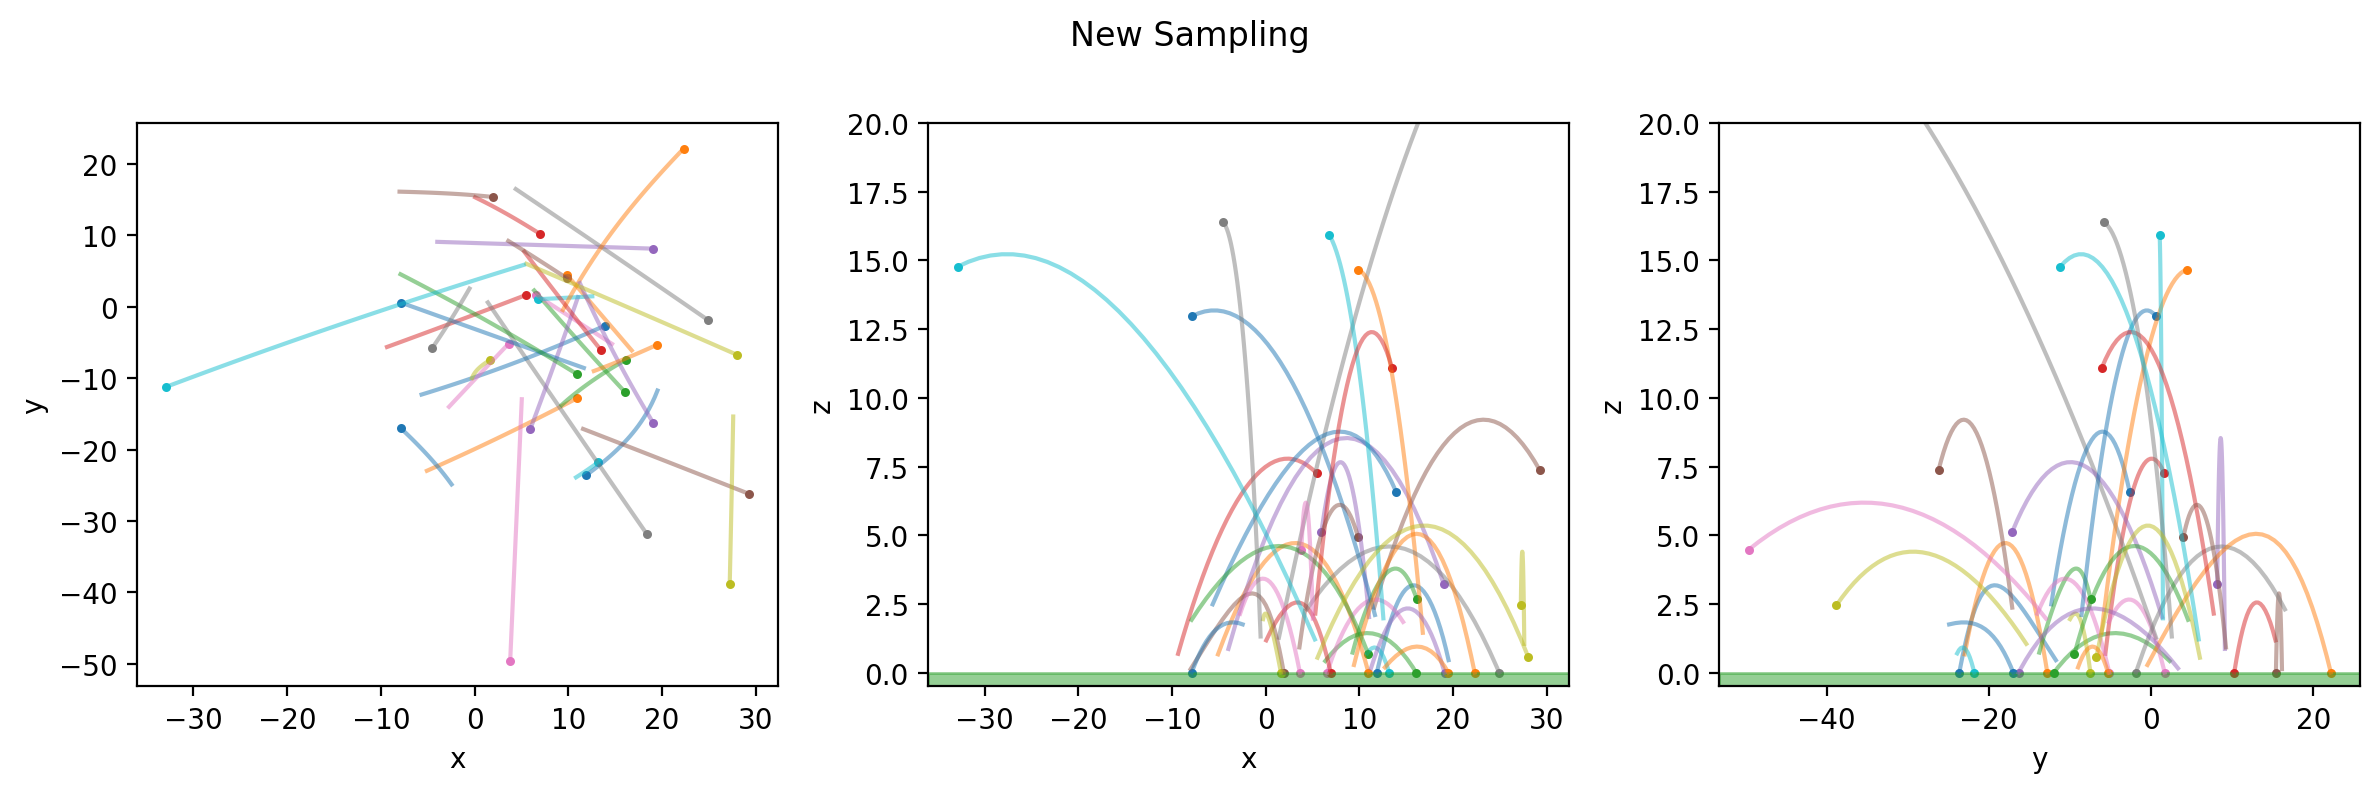

In [22]:
N_TRAJECTORIES = 32

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=200)

for ax, (i, j), (iname, jname) in zip(axes, [(0, 1), (0, 2), (1, 2)], [("x", "y"), ("x", "z"), ("y", "z")]):
    for k in range(N_TRAJECTORIES):
        ax.plot(X[k, :, i], X[k, :, j], alpha=0.5, color=f'C{k%10}')
        ax.scatter(X[k, -1, i], X[k, -1, j], s=5, color=f'C{k%10}')
    ax.set_xlabel(iname)
    ax.set_ylabel(jname)

    if j == 2:
        # Draw the ground
        ax.axhspan(-10, 0, color="tab:green", alpha=0.5)

        ax.set_ylim(-0.5, 20)

fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle("New Sampling")

In [ ]:
X.shape

(1000, 30, 3)

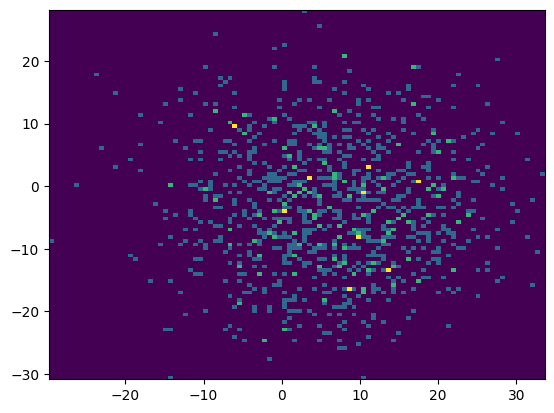

In [ ]:
plt.hist2d(X[:,0, 0], X[:, 0, 1], bins=100,);